# Requirements

## Layout requirements

Generate a layout for each assay in a csv format containing the following columns:

- "Well": name of each well, i.e., A1, A2, A3....
- "Treatment": name of the treatment contained in each well, i.e., Control, Nanoparticle....
- "Cell": name of the cell lineage that was used in that well.

The filename must be: "layout_YYYYMMDD.csv"

## Data format
Have a csv file containing the following informations in each column:
- "Time": time taken to acquire each image, preferably in minutes.
- "Area": area measured in each image at that point in time, preferably in pixels.

## Folder requirements

Folders must be organized by the date (YYYYMMDD) of the assay with all the files inside that folder. Example:
- 20210428/A1_data.csv

In [1]:
import utilitary
%matplotlib inline

In [2]:
objective_conversion = utilitary.fig_micrometers()
figname = input("Provide a figure to measure the area and height in pixels. Provide name with extension (.tif, .png)")
pic_total_area = utilitary.fig_total_area(figname)
pic_height = utilitary.pic_height(figname)

Which objective size have you used? Options are 4x, 10x and 20x. 4x


Objective conversion from um to pixels is 1.611928 micrometers.


Provide a figure to measure the area and height in pixels. Provide name with extension (.tif, .png) A1_03_1_1_Phase Contrast_001.tif


Total area in pixels = 1106496
Picture height = 904


In [214]:
terminator = input("What's the terminator that comes after the name of the well? Example: _dados, _data, etc.")
area_column = input("What's the name of the column containing the AREA, IN PIXELS?")
time_column = input("What's the name of the column containig the TIME, IN MINUTES?")

What's the terminator that comes after the name of the well? Example: _dados, _data, etc. _data
What's the name of the column containing the AREA, IN PIXELS? Area (pixel^2)
What's the name of the column containig the TIME, IN MINUTES? Time (min)


In [228]:
layout, date = utilitary.open_layout()
layout = utilitary.add_columns(layout)
layout.head(25)

Which is the date of your experiment (YYYYMMD)? Provide the path if different from YYYYMMDD 20210428


,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,PNT1A,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1,A2,PNT1A,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
2,A3,PNT1A,Methacycline 5 uM,0.0,0.0,0.0,0.0,0.0,0.0,0.6
3,A4,PC3,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
4,A5,PC3,Control,0.0,0.0,0.0,0.0,0.0,0.0,0.6
5,A6,PC3,Methacycline 5 uM,0.0,0.0,0.0,0.0,0.0,0.0,0.6
6,B1,PNT1A,TGF-B 1 ng/mL,0.0,0.0,0.0,0.0,0.0,0.0,0.6
7,B2,PNT1A,TGF-B 1 ng/mL,0.0,0.0,0.0,0.0,0.0,0.0,0.6
8,B3,PNT1A,Methacycline 10 uM,0.0,0.0,0.0,0.0,0.0,0.0,0.6
9,B4,PC3,TGF-B 1 ng/mL,0.0,0.0,0.0,0.0,0.0,0.0,0.6


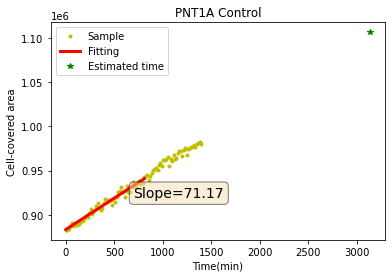

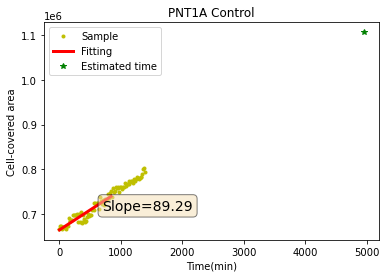

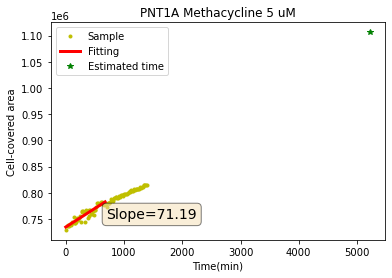

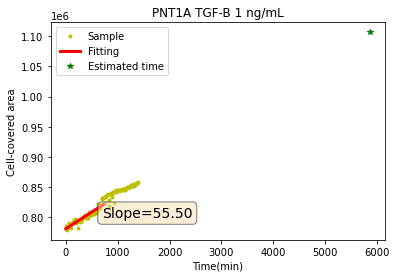

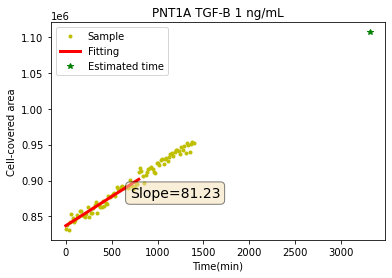

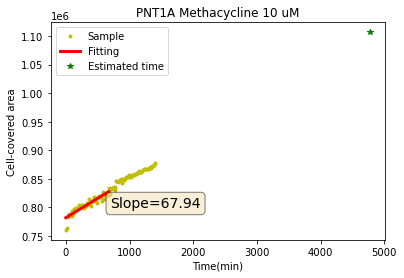

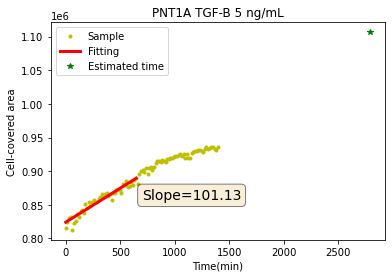

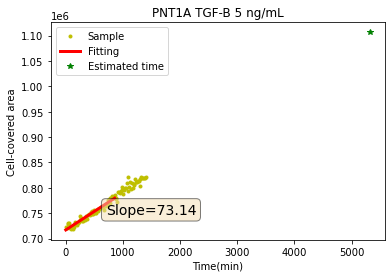

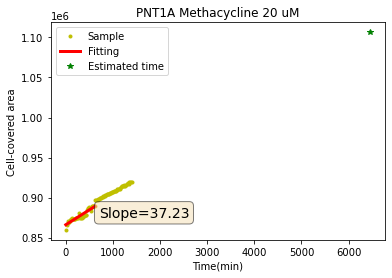

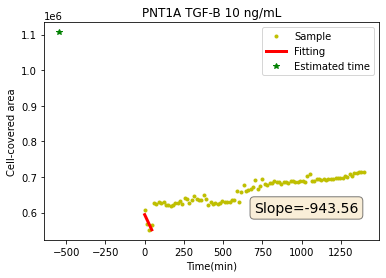

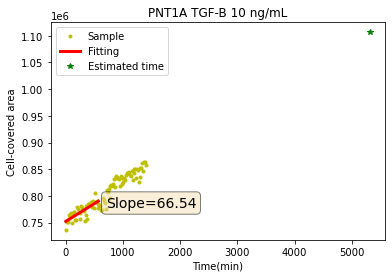

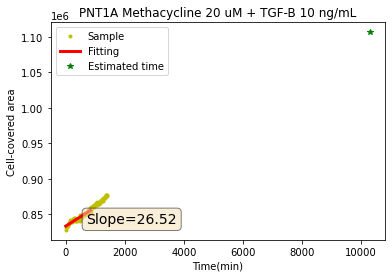

In [230]:
for i, row in layout.iterrows():
    well = row['Well']
    index = row.name
    try:
        df = utilitary.open_df(well, date, pic_total_area, terminator = terminator, area_column = area_column)
        begin, end = utilitary.define_end(df, layout, index)
        X, y, reg = utilitary.fit_linear_regression(df, layout, begin, end, index, time_column = time_column)
        x_fit, y_fit = utilitary.calculate_fit(df, layout, begin, end, index, time_column = time_column)
        time = utilitary.time_velocity(layout, index, pic_total_area)
        velocity = utilitary.migration_velocity(layout, index, pic_height, objective_conversion)
        utilitary.plot(df, layout, begin, end, index, date, well, time, pic_total_area, x_fit, y_fit, time_column = time_column) 
    except FileNotFoundError:
        layout = layout.drop([index])

## Change the fitting manually

- If you'd like to change a fitting (fit more or less data, different from 60%) use the following function:

In [226]:
layout

,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,PNT1A,Control,74.774034,6.615215e+05,0.988329,0.066665,99.182045,0.0,0.6
3,A4,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
4,A5,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
5,A6,PC3,Methacycline 5 uM,521.305000,1.003566e+06,0.944380,0.464771,3.290782,0.0,0.6
9,B4,PC3,TGF-B 1 ng/mL,943.506667,1.010423e+06,0.995194,0.841186,1.697087,0.0,0.6
10,B5,PC3,TGF-B 1 ng/mL,909.006667,1.014558e+06,0.965514,0.810428,1.685684,0.0,0.6
11,B6,PC3,Methacycline 10 uM,386.262020,9.701564e+05,0.830870,0.344373,5.882865,0.0,0.4
14,C3,PNT1A,Methacycline 20 uM,73.247542,8.351627e+05,0.995131,0.065304,61.738890,0.0,0.6
15,C4,PC3,TGF-B 5 ng/mL,621.270000,9.587214e+05,0.918714,0.553895,3.964315,0.0,0.6
16,C5,PC3,TGF-B 5 ng/mL,916.296667,1.012567e+06,0.986836,0.816927,1.708482,0.0,0.6


In [229]:
utilitary.change_end_fit(layout)

Enter indexes from the wells you wish to change separated by space 18 19
Enter the value you'd like to change the end of the fitting (from 0.6 to?) 0.4


## Change the fitting by testing a few different values

In [23]:
for i, row in layout.iterrows():
    well = 'B4'
    index = row.name
    try:
        df = utilitary.open_df(well, date, pic_total_area, terminator = terminator, area_column = area_column)
        begin, end = utilitary.define_end(df, layout, index)
        print(type(end), end)
    except FileNotFoundError:
        layout = layout.drop([index])

<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11
<class 'int'> 11


In [41]:
list_end = ['0.4', '0.5', '0.6']
list_end = [int(n) for n in list_end]

ValueError: invalid literal for int() with base 10: '0.4'

In [40]:
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
list_scores = []
for end in list_end:
    interpolate_df = interp1d([0, 1],[df['cell covered'].min(), df['cell covered'].max()]) 
    #find the value in cell-covered that corresponds to 60% of the data (assuming the higher value is equal to 100%)
    list_linearfit = []
    for value in df['cell covered']:
        if value <= interpolate_df(list_end[end]):
            list_linearfit.append(value)
    begin = 0
    end = len(list_linearfit) 
    print(begin, end)
    
#     y = df['cell covered'][begin:end].to_numpy().reshape(-1, 1)
#     X = df[time_column][begin:end].to_numpy().reshape(-1, 1)
#     reg = LinearRegression().fit(X, y)
#     list_scores.append(reg.score(X, y))

TypeError: list indices must be integers or slices, not str

## Save results in a csv file

In [231]:
layout.to_csv(date + '/Results_' + date + '.csv', sep = ',')

In [179]:
layout

,Well,Treatment,Cell,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,A1,Control,PNT1A,-448.532213,7.206060e+05,0.286805,-0.399890,-14.338992,0.0,0.60
1,A2,"SLN 0,2X",PNT1A,77.039694,4.283160e+05,0.810924,0.068685,146.716578,0.0,0.60
3,A4,Control,PC3,112.198336,9.749114e+05,0.894910,0.100031,19.546431,0.0,0.80
4,A5,"SLN 0,2X",PC3,129.443064,9.543782e+05,0.862771,0.115405,19.586189,0.0,0.60
5,A6,"SLN 0,02X",PC3,82.126232,9.476758e+05,0.957116,0.073220,32.230908,0.0,0.60
6,B1,Control,PNT1A,99.247184,6.923158e+05,0.963736,0.088484,69.553644,0.0,0.60
9,B4,Control,PC3,119.137043,9.198887e+05,0.932190,0.106217,26.105419,0.0,0.80
10,B5,"SLN 0,2X",PC3,84.940074,1.001632e+06,0.867020,0.075729,20.576160,0.0,0.60
11,B6,"SLN 0,02X",PC3,37.436114,9.754759e+05,0.839080,0.033376,58.330541,0.0,0.60
15,C4,SLN 1X,PC3,181.792814,9.388354e+05,0.956254,0.162078,15.371034,0.0,0.35


## Import results

In [143]:
df, date = utilitary.import_results()

Which is the date of your experiment (YYYYMMD)? Provide the path if different from YYYYMMDD 20191113


## Get hue order

In [ ]:
hueorder = sorted(list(df['Treatment'].unique()))
hueorder

## Select only positive values of velocity and r2 score higher than 0.75

In [4]:
df = df[(df['Velocity']>0)]
df = df[(df['R^2score']>0.75)] 